# Logistic Regression and Neural Networks
In this notebook, we'll do the following:
- Develop the perceptron algorithm by hand
- Develop a logistic regression example by hand
- Redevelop it with Keras
- Try it in a non-linearly separable set
- Train a neural network in Keras to solve this problem

### Imports

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Tools for loading and plotting data

In [56]:
# Tool for loading the data points
def load_pts(csv_name): 
    # load data
    data = np.asarray(pd.read_csv(csv_name,header = None))
    X = data[:,0:2]
    y = data[:,2]

    # Plot points
    draw_dataset(X, y)
    plt.show()
    return X,y

def draw_dataset(X, y):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    #x = np.arange(x_min-100, x_max+100, 0.1)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    blue = [0.25,0.5,1]    # custom color for plotting purposes
    red = [1,0.3,0.3]   # custom color for plotting purposes
    for i in range(len(y)):
        if y[i]==0:
            plt.scatter(X[i][0], X[i][1], color=red, edgecolor = 'k')
        else:
            plt.scatter(X[i][0], X[i][1], color=blue, edgecolor = 'k')

def display(X, y, W, b, color='g--'):
    x = np.arange(-100.0, 100.0, 0.1)
    plt.plot(x, -W[0]/W[1]*x - b/W[1], color)

## Perceptron Algorithm

In [57]:
# Set a random seed
np.random.seed(10)

# Step function
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# The prediction
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# One perceptron step
def perceptronStep(X, y, W, b, learn_rate):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

# The perceptron algorithm
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 1000):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    draw_dataset(X, y)
    display(X, y, W, b)
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        if i % (num_epochs/10) == 0:
            display(X, y, W, b)
        current_prediction = prediction(X,W,b)
    display(X, y, W, b, 'black')
    plt.title("Solution boundary")
    plt.show()

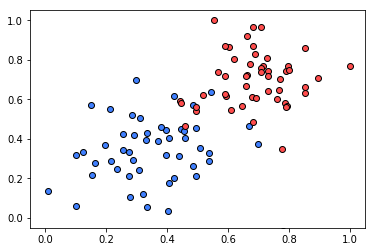

In [60]:
# use the plotting function to visualize our data
X,y = load_pts('files/2class_overlap.csv')
draw_dataset(X,y)

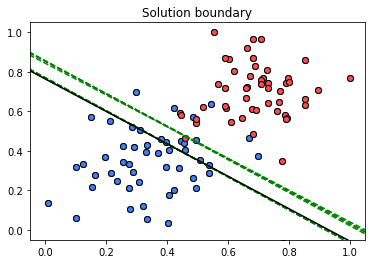

In [61]:
trainPerceptronAlgorithm(X,y)

## Logistic Regression Algorithm

In [72]:
X,y = load_pts('files/2class_overlap.csv')

def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def prediction(X, W, b):
    return sigmoid(np.matmul(X,W)+b)
def error_vector(y, y_hat):
    return [-y[i]*np.log(y_hat[i]) - (1-y[i])*np.log(1-y_hat[i]) for i in range(len(y))]
def dErrors(X, y, y_hat):
    DErrorsDx1 = [X[i][0]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDx2 = [X[i][1]*(y[i]-y_hat[i]) for i in range(len(y))]
    DErrorsDb = [y[i]-y_hat[i] for i in range(len(y))]
    return DErrorsDx1, DErrorsDx2, DErrorsDb
def draw_dataset(X, y):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    #x = np.arange(x_min-100, x_max+100, 0.1)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    for i in range(len(y)):
        if y[i]==0:
            plt.scatter(X[i][0], X[i][1], color='red', edgecolor = 'k')
        else:
            plt.scatter(X[i][0], X[i][1], color='blue', edgecolor = 'k')
def display(X, y, W, b, color='g--'):
    y_hat = prediction(X,W,b)
    errors = error_vector(y, y_hat)
    error = sum(errors)
    derivErrors = dErrors(X, y, y_hat)
    x = np.arange(-100.0, 100.0, 0.1)
    plt.plot(x, -W[0]/W[1]*x - b/W[1], color)
def trainStep(X, y, W, b, learn_rate):
    y_hat = prediction(X,W,b)
    errors = error_vector(y, y_hat)
    derivErrors = dErrors(X, y, y_hat)
    W[0] += sum(derivErrors[0])*learn_rate
    W[1] += sum(derivErrors[1])*learn_rate
    b += sum(derivErrors[2])*learn_rate
    return W, b, sum(errors)
def trainLR(X, y, learn_rate = 0.01, num_epochs = 10000):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    draw_dataset(X, y)
    display(X, y, W, b)
    previous_error = 1000000
    error_plot = []
    for i in range(num_epochs):
        W, b, e = trainStep(X, y, W, b, learn_rate)
        if e/previous_error < 0.8:
            display(X, y, W, b, 'g--')
            #print("epoch: ", i)
            previous_error = e
        error_plot.append(e)
        current_prediction = prediction(X,W,b)
    display(X, y, W, b, 'black')
    plt.title("Solution boundary")
    plt.show()
    plt.plot(error_plot)
    plt.title("Error function")
    plt.show()

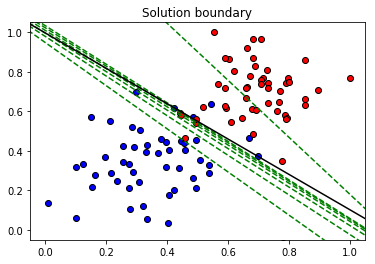

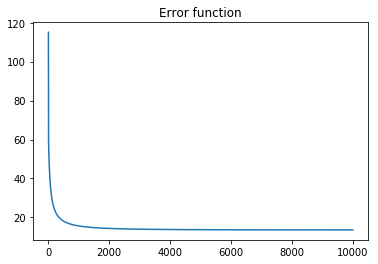

In [73]:
trainLR(X, y)

## Logistic Regression in Keras

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_16 (Activation)   (None, 1)                 0         
Total params: 3.0
Trainable params: 3.0
Non-trainable params: 0.0
_________________________________________________________________
 32/100 [========>.....................] - ETA: 0s
Accuracy: 0.92
[[-2.82927346]
 [-1.20802152]]
2.00088


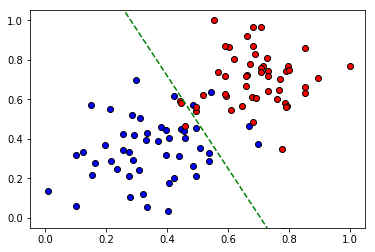

In [90]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

X,y = load_pts('files/2class_overlap.csv')

model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Activation('sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.summary()

model.fit(X, y, batch_size = 1, epochs= 100, verbose=0)
score = model.evaluate(X, y)
print("\nAccuracy:", score[1])
#print("Predictions:",model.predict_proba(X))
#print("Weights:", model.get_weights())
draw_dataset(X, y)
W = model.get_weights()[0]
b = model.get_weights()[1][0]
print(W)
print(b)
display(X, y, W, b, 'g--')
plt.show()

## Neural Networks in Keras

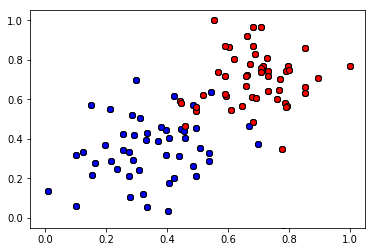

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 2)                 6         
_________________________________________________________________
activation_25 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 6         
_________________________________________________________________
activation_26 (Activation)   (None, 2)                 0         
Total params: 12.0
Trainable params: 12.0
Non-trainable params: 0.0
_________________________________________________________________
 32/100 [========>.....................] - ETA: 0s
Accuracy: 0.93


In [95]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

X,y = load_pts('files/2class_overlap.csv')
draw_dataset(X, y)
plt.show()

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# One-hot encoding the output
new_y = np_utils.to_categorical(y)

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

model.fit(X, new_y, batch_size = 1, epochs= 100, verbose=0)
score = model.evaluate(X, new_y)
print("\nAccuracy:", score[1])

## Neural Network in Keras for a non-linearly separable set

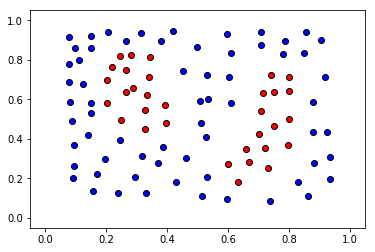

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               1536      
_________________________________________________________________
activation_31 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_32 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 1026      
_________________________________________________________________
activation_33 (Activation)   (None, 2)                 0         
Total para

In [98]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

X,y = load_pts('files/2eggs_data.csv')

model = Sequential()
model.add(Dense(512, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# One-hot encoding the output
new_y = np_utils.to_categorical(y)

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

model.fit(X, new_y, batch_size = 1, epochs= 100, verbose=0)
score = model.evaluate(X, new_y)
print("\nAccuracy:", score[1])